# Explore here

In [64]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
import os

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/insurance_raw.csv', index=False)

print(f'Dataset stored as {output_dir}/insurance_raw.csv')

Dataset stored as data/raw/insurance_raw.csv


In [66]:
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [67]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/insurance.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('insurance_Data', con=engine, if_exists='replace', index=False)

1338

In [68]:
# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM insurance_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
# Check the unique values in categorical columns
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [71]:
# Check the unique values in categorical columns
df['age'].value_counts()

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [72]:
# Check the unique values in categorical columns
df['charges'].value_counts()

charges
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64

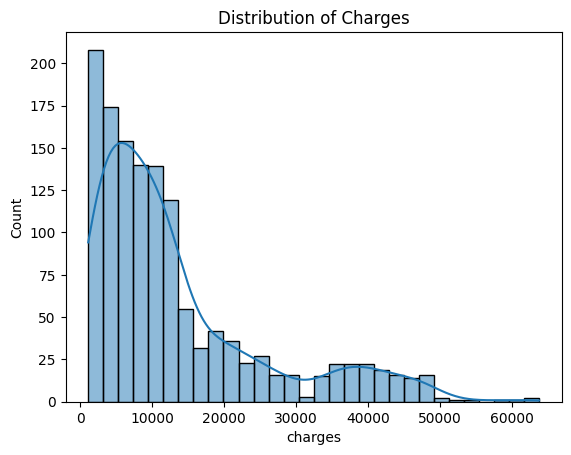

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'charges' column
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.show()

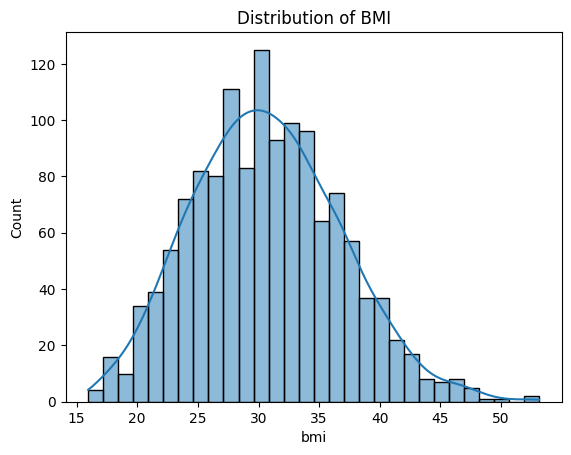

In [74]:
# Plot a histogram for the 'bmi' column
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

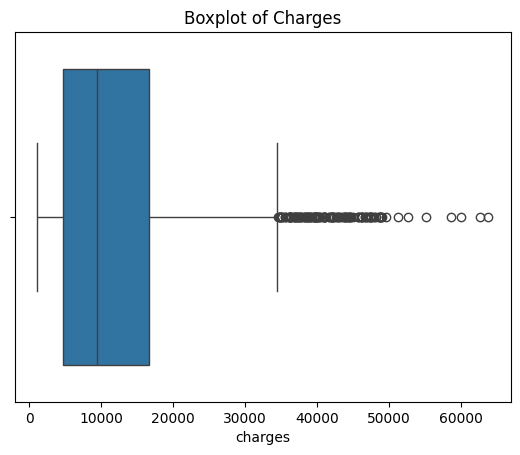

In [75]:
# Boxplot for Charges
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Charges')
plt.show()

In [76]:
# Check the charges (class balance)
df['charges'].value_counts(normalize=True)

charges
1639.56310     0.001495
2221.56445     0.000747
19798.05455    0.000747
13063.88300    0.000747
13555.00490    0.000747
                 ...   
1149.39590     0.000747
37079.37200    0.000747
4738.26820     0.000747
2897.32350     0.000747
4762.32900     0.000747
Name: proportion, Length: 1337, dtype: float64

In [77]:
# Obtain dimensions of dataframe
# (# rows, # columns)
df.shape

(1338, 7)

In [78]:
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
df.duplicated().sum()

np.int64(1)

In [80]:
#1 duplicate existed before running this code
df = df.drop_duplicates()

In [81]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [83]:
# Define the threshold (e.g., 30%)
threshold = 30

# Drop columns where the percentage of missing values exceeds the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns from the dataframe
df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")

Following columns were dropped: []


In [84]:
# Check the remaining columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


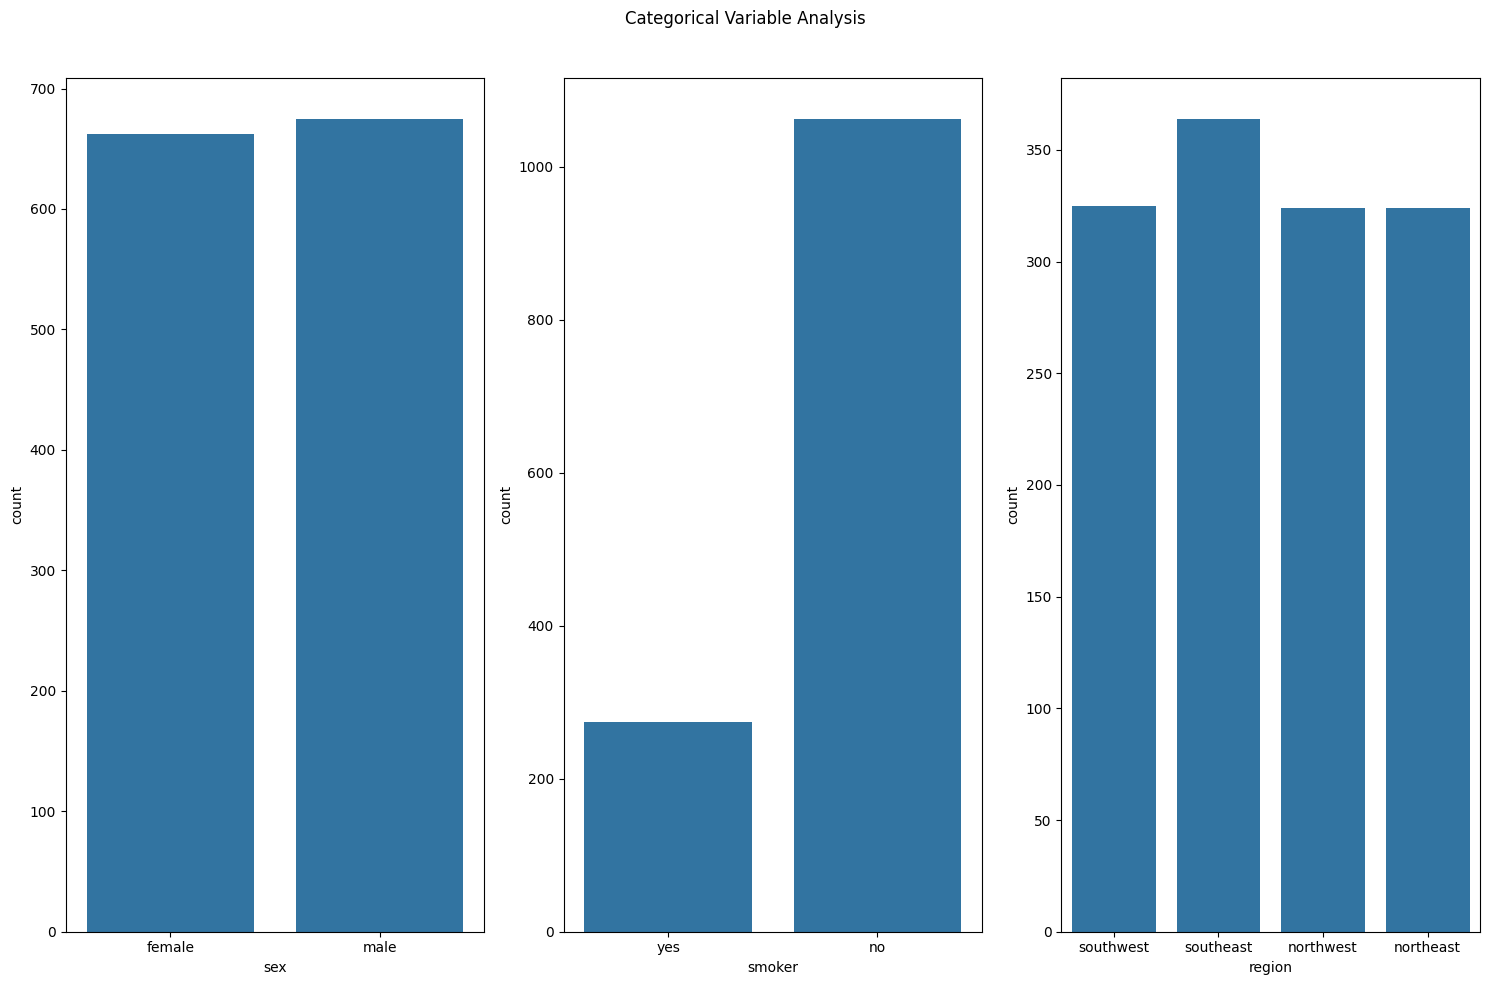

In [85]:
categorical_features = ['sex_n', 'smoker_n', 'region_n']

fig, axis = plt.subplots(1, 3, figsize=(15, 10))  

sns.countplot(ax=axis[0], data=df, x="sex")
sns.countplot(ax=axis[1], data=df, x="smoker")
sns.countplot(ax=axis[2], data=df, x="region")


plt.suptitle("Categorical Variable Analysis")
plt.tight_layout(rect=[0, 0, 1, 0.96])  


plt.show()

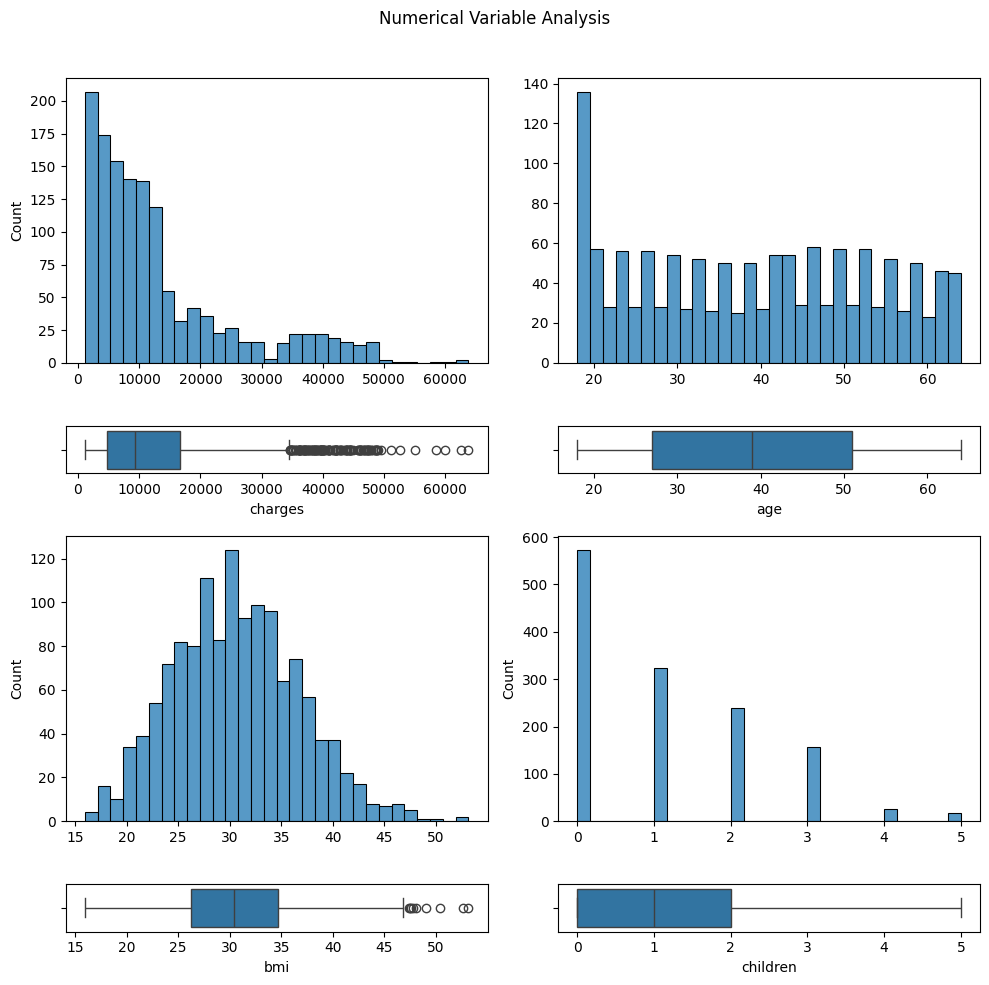

In [86]:
numerical_features = ['age', 'bmi', 'children', 'charges']

fig, axis = plt.subplots(4, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax=axis[0, 0], data=df, x="charges", bins=30).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="charges") 

sns.histplot(ax=axis[0, 1], data=df, x="age", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="age")

sns.histplot(ax=axis[2, 0], data=df, x="bmi", bins=30).set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x="bmi")


sns.histplot(ax=axis[2, 1], data=df, x="children", bins=30).set(xlabel=None)  
sns.boxplot(ax=axis[3, 1], data=df, x="children")  

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title


plt.show()

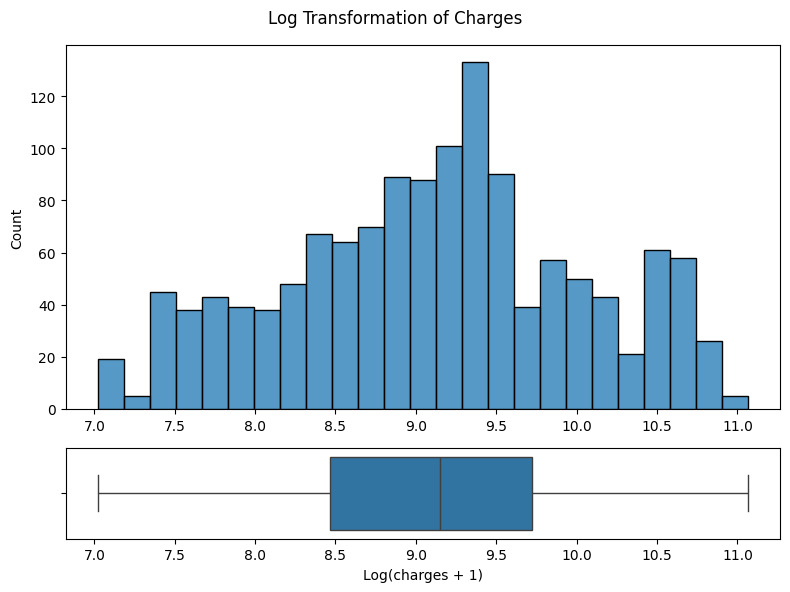

In [87]:
import numpy as np

# Create a figure with 2 subplots: one for the histogram and one for the boxplot
fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

# Apply log transformation to 'Price' using log1p (log(x + 1)) to avoid log(0)
# Plot the log-transformed 'Price' histogram and boxplot
sns.histplot(np.log1p(df['charges']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['charges']), ax=axis[1])
axis[1].set_xlabel('Log(charges + 1)')

# Adjust layout and show the plot
plt.suptitle("Log Transformation of Charges")
plt.tight_layout()
plt.show()

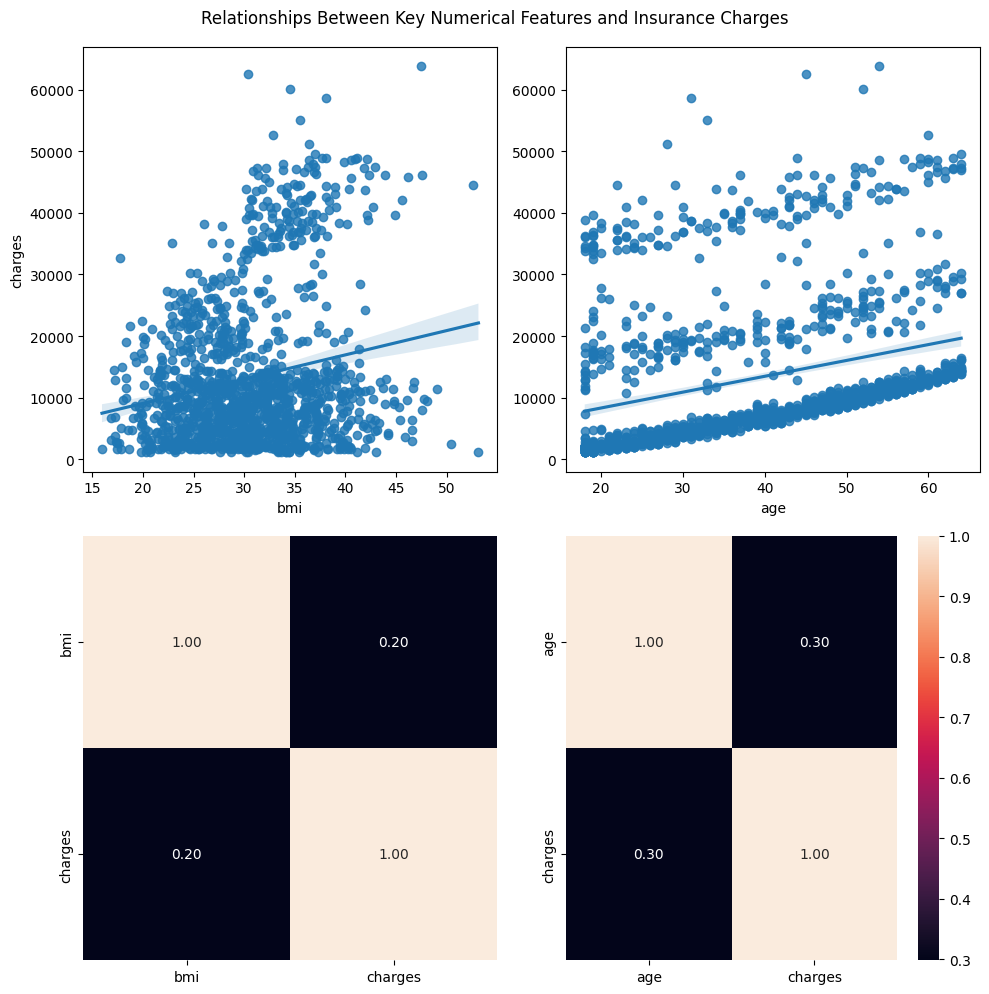

In [88]:
# Our numerical features
numerical_features

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


plt.suptitle("Relationships Between Key Numerical Features and Insurance Charges", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()

In [89]:
# Our numerical features
numerical_features

['age', 'bmi', 'children', 'charges']

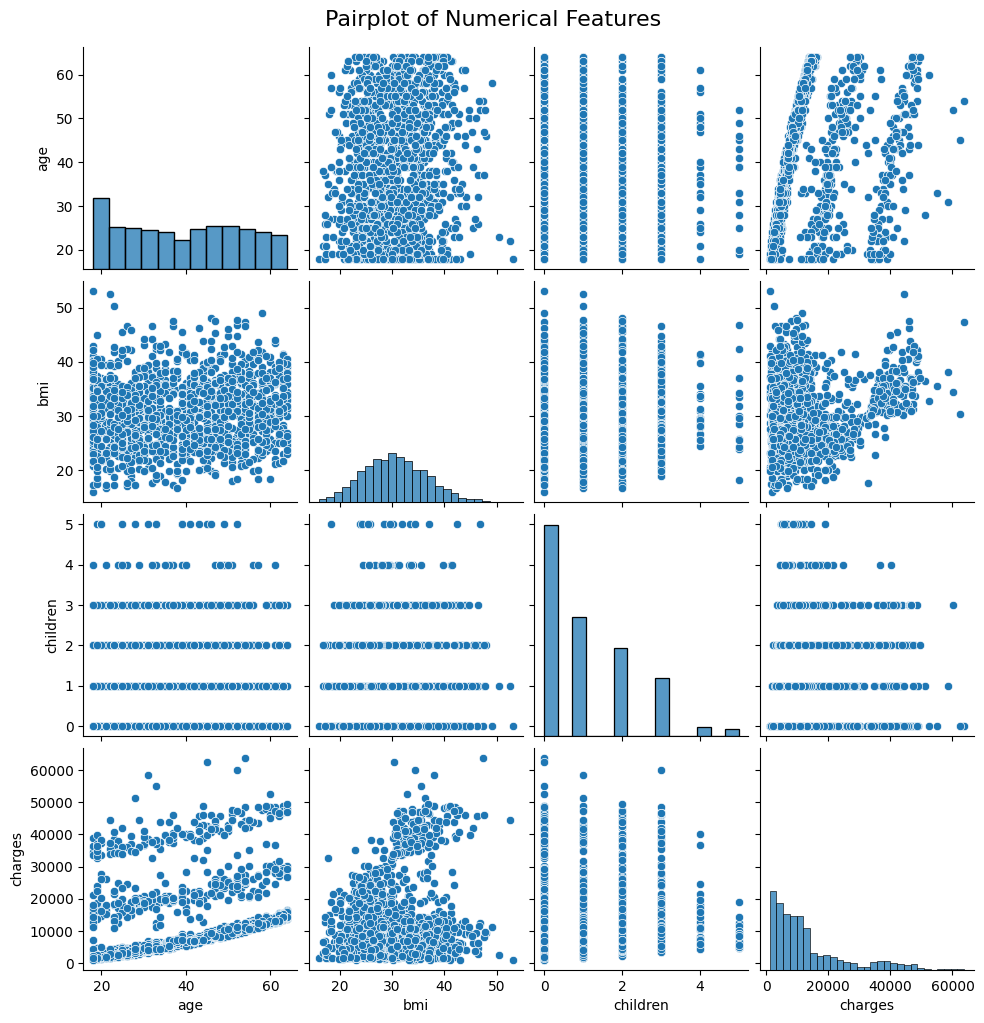

In [90]:
# Warning! Pairplots can be slow!
sns.pairplot(data = df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

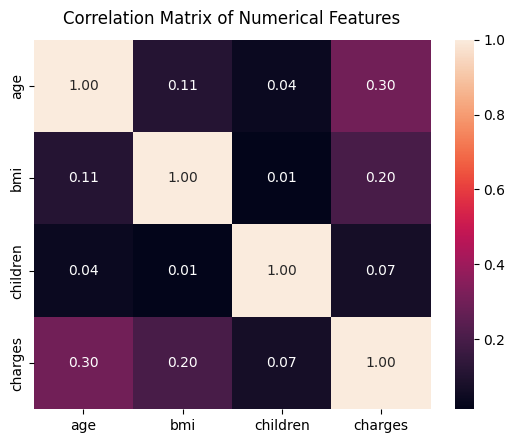

In [91]:
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()

In [92]:
# Our categorical features
categorical_features

['sex_n', 'smoker_n', 'region_n']

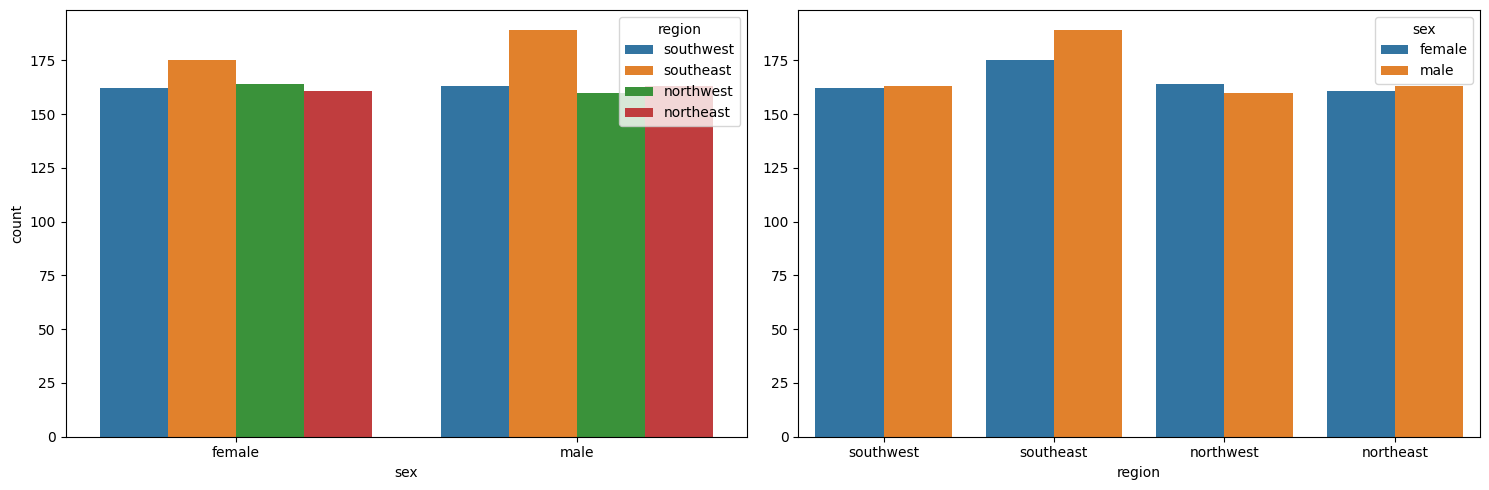

In [93]:
fig, axis = plt.subplots(1,2, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "sex", hue = "region")
sns.countplot(ax = axis[1], data = df, x = "region", hue = "sex").set(ylabel = None)


plt.tight_layout()

plt.show()

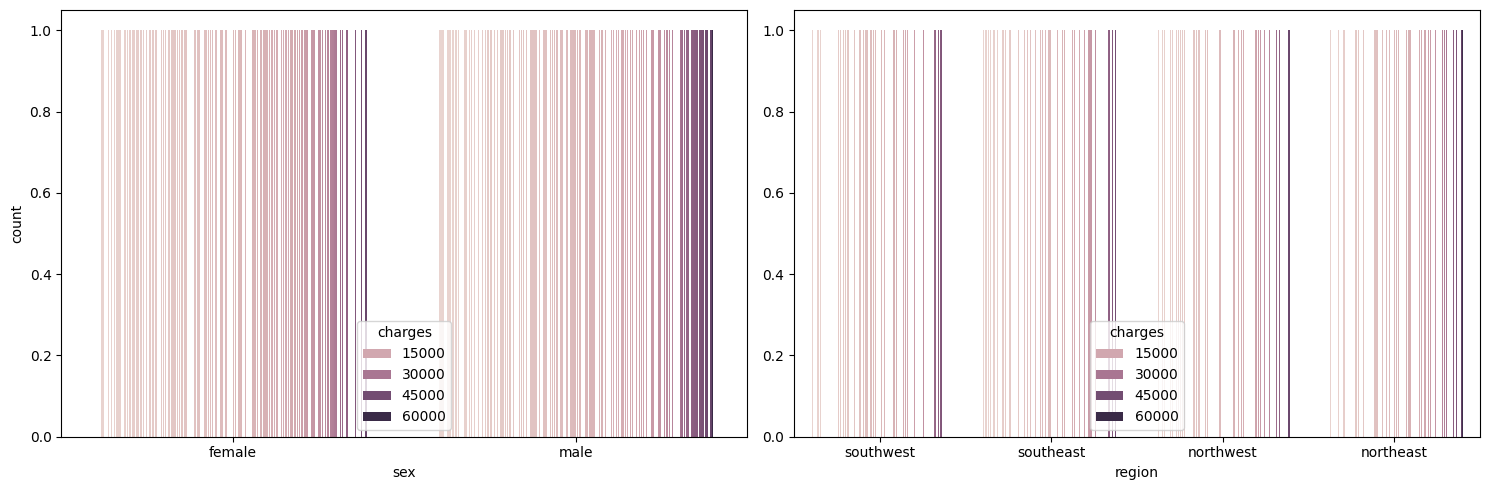

In [94]:
fig, axis = plt.subplots(1,2, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "sex", hue = "charges")
sns.countplot(ax = axis[1], data = df, x = "region", hue = "charges").set(ylabel = None)

plt.tight_layout()

plt.show()

In [95]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

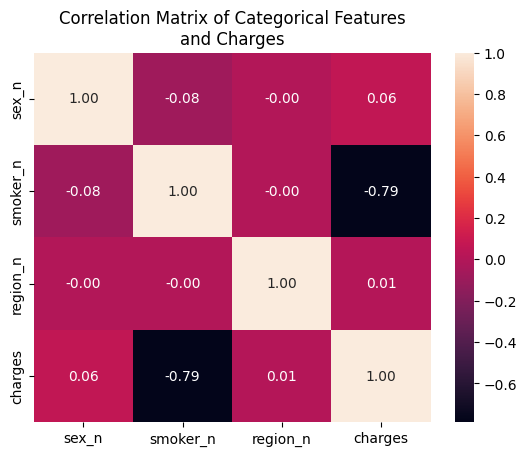

In [96]:
categorical_features = ['sex_n', 'smoker_n', 'region_n']

sns.heatmap(df[categorical_features + ['charges']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Categorical Features\nand Charges")
plt.show()

In [97]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['age', 'bmi', 'children', 'charges']
Categorical features: ['sex_n', 'smoker_n', 'region_n']


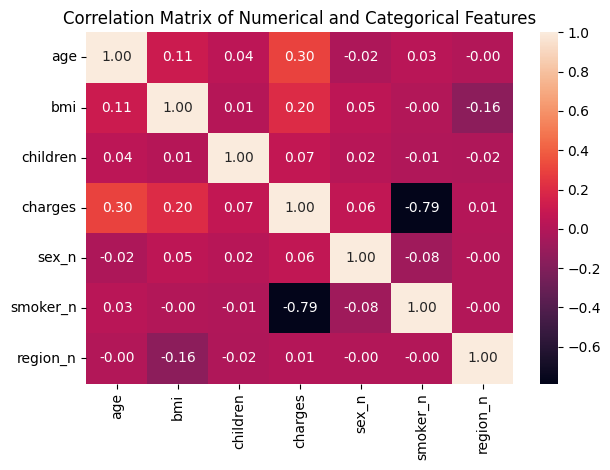

In [98]:
sns.heatmap(df[numerical_features + categorical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical and Categorical Features")
plt.tight_layout()

In [99]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,age,bmi,children,charges,sex_n,smoker_n,region_n
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


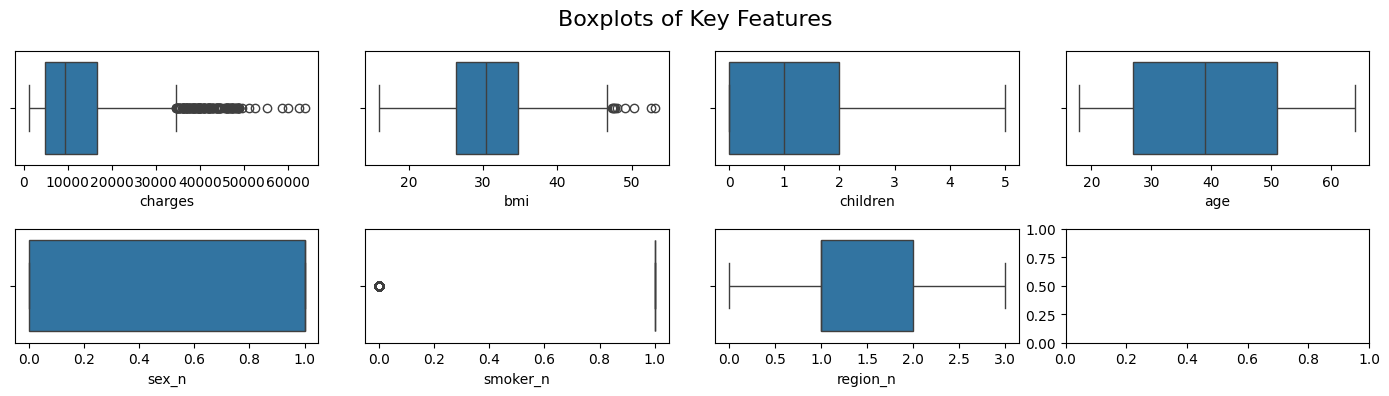

In [100]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], data = df, x = "charges")
sns.boxplot(ax = axis[0, 1], data = df, x = "bmi")
sns.boxplot(ax = axis[0, 2], data = df, x = "children")
sns.boxplot(ax = axis[0, 3], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "sex_n")
sns.boxplot(ax = axis[1, 1], data = df, x = "smoker_n")
sns.boxplot(ax = axis[1, 2], data = df, x = "region_n")


fig.suptitle("Boxplots of Key Features", fontsize=16)
plt.tight_layout()

plt.show()

In [101]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [102]:
df['age'].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [103]:
df['children'].describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [104]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [105]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['age', 'bmi', 'children', 'charges']
Categorical features: ['sex_n', 'smoker_n', 'region_n']


In [106]:
X = df[['age', 'bmi','children', 'sex_n', 'region_n', 'smoker_n']] # A dataframe (double brackets)
y = df['charges'] # A series (single brackets)

In [107]:
X

,age,bmi,children,sex_n,region_n,smoker_n
0,19,27.900,0,0,0,0
1,18,33.770,1,1,1,1
2,28,33.000,3,1,1,1
3,33,22.705,0,1,2,1
4,32,28.880,0,1,2,1
...,...,...,...,...,...,...
1333,50,30.970,3,1,2,1
1334,18,31.920,0,0,3,1
1335,18,36.850,0,0,1,1
1336,21,25.800,0,0,0,1


In [108]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 1337
Dimensions of X_train: (1069, 6)
Dimensions of y_train: (1069,)
Proportion of train set: 1069 / 1337 = 0.80 = 80%


In [111]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 1337
Dimensions of X_test: (268, 6)
Dimensions of y_test: (268,)
Proportion of test set: 268 / 1337 = 0.20 = 20%


In [112]:
high_charges_count = df[df['charges'] >= 1000].shape[0] 
print(high_charges_count)

1337


In [113]:
zero_charges_count = df[df['charges'] == 0].shape[0] 
print(zero_charges_count)

0


In [114]:
print(df[['sex_n', 'smoker_n', 'region_n']])

      sex_n  smoker_n  region_n
0         0         0         0
1         1         1         1
2         1         1         1
3         1         1         2
4         1         1         2
...     ...       ...       ...
1333      1         1         2
1334      0         1         3
1335      0         1         1
1336      0         1         0
1337      0         0         2

[1337 rows x 3 columns]


In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
print("Unique values in 'sex_n':", df['sex_n'].unique())

Unique values in 'sex_n': [0 1]


In [117]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])
X_train_sel

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,bmi,children,sex_n,region_n,smoker_n
0,-0.093941,-0.090030,-1.019841,-0.444142,0.504673
1,-0.218986,-0.090030,0.980545,-0.444142,0.504673
2,-0.451212,-0.090030,-1.019841,-0.444142,0.504673
3,-0.633095,-0.905644,-1.019841,0.463674,-1.981481
4,0.698550,-0.090030,-1.019841,-1.351958,0.504673
...,...,...,...,...,...
1064,-0.432536,-0.090030,0.980545,0.463674,0.504673
1065,0.107430,-0.905644,-1.019841,0.463674,0.504673
1066,1.853184,-0.905644,0.980545,-0.444142,0.504673
1067,0.870690,0.725583,-1.019841,-0.444142,0.504673


In [118]:
dict(zip(X_train.columns,selection_model.scores_))

{'age': np.float64(nan),
 'bmi': np.float64(nan),
 'children': np.float64(nan),
 'sex_n': np.float64(nan),
 'region_n': np.float64(nan),
 'smoker_n': np.float64(nan)}

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(predictions)

[ 8.08045019e+03  5.59287112e+03  1.43782987e+04  3.17318195e+04
  9.15835694e+03  1.33610143e+04  3.02576553e+04  1.30864736e+03
  1.08494254e+04  1.13755485e+04  1.04822214e+04  3.31558608e+04
  3.09123841e+04  1.71688443e+04  1.06361393e+04  9.37424715e+03
  3.96524338e+03  3.19229863e+04  3.08468457e+03  5.47544373e+03
  3.76844305e+03  3.01552667e+04  1.50768984e+04  3.02746510e+04
  3.10830548e+04  5.52001772e+03  3.56655758e+04  3.63713163e+04
  1.12979802e+04  1.40664742e+04  6.37519963e+03  1.29381095e+04
  6.79284837e+02  1.19476924e+04  3.97832706e+04  1.21517558e+04
  4.57717842e+03  4.01652351e+03  3.11475453e+04  9.22301501e+03
  6.86852604e+03  3.00358113e+04  3.49732855e+04  1.21709787e+04
  7.46262777e+03  3.27014535e+03  6.02195905e+03  8.81742438e+03
  4.32171874e+03  9.25718479e+03  6.82679737e+03  1.18887556e+04
  3.11350727e+04  3.77190864e+03  1.08474792e+04  9.98520023e+03
  1.07454815e+04  2.50630360e+03  3.13486291e+04  9.44527226e+03
  1.57668832e+04  8.41228

In [120]:
print(y_test)

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64


In [121]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(X_test)

Intercept: 11291.590752555669
Coefficients: [   248.76407134    312.60904469    534.12087654    -99.69539417
    237.62514748 -23052.15275173]
      age     bmi  children  sex_n  region_n  smoker_n
900    49  22.515         0      1         3         1
1064   29  25.600         4      0         0         1
1256   51  36.385         3      0         2         1
298    31  34.390         3      1         2         0
237    31  38.390         2      1         1         1
...   ...     ...       ...    ...       ...       ...
534    64  40.480         0      1         1         1
542    63  36.300         0      0         1         1
760    22  34.580         2      0         3         1
1284   61  36.300         1      1         0         0
1285   47  24.320         0      0         3         1

[268 rows x 6 columns]


In [122]:
import pandas as pd

# Make predictions on the test data
y_hat = model.predict(X_test)

# Check lengths of the arrays
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of Predictions (y_hat): {len(y_hat)}")

# Check the type and shape of y_test
print(f"Type of y_test: {type(y_test)}")
print(f"Shape of y_test: {y_test.shape}")

columns = ['age', 'sex', 'bmi', 'children', 'region', 'charges']

# Create a df for your X_test
df_test = X_test.copy()

# Add columns for the original y_test values and y_hat
df_test['charges'] = y_test
df_test['Predicted charges'] = y_hat

# Display the DataFrame
print(df_test)

Length of X_test: 268
Length of y_test: 268
Length of Predictions (y_hat): 268
Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (268,)
      age     bmi  children  sex_n  region_n  smoker_n      charges  \
900    49  22.515         0      1         3         1   8688.85885   
1064   29  25.600         4      0         0         1   5708.86700   
1256   51  36.385         3      0         2         1  11436.73815   
298    31  34.390         3      1         2         0  38746.35510   
237    31  38.390         2      1         1         1   4463.20510   
...   ...     ...       ...    ...       ...       ...          ...   
534    64  40.480         0      1         1         1  13831.11520   
542    63  36.300         0      0         1         1  13887.20400   
760    22  34.580         2      0         3         1   3925.75820   
1284   61  36.300         1      1         0         0  47403.88000   
1285   47  24.320         0      0         3         1   8534.67

In [123]:
from sklearn import metrics
import numpy as np  

# Calculate MAE
mae = metrics.mean_absolute_error(y_test, y_hat)

# Calculate MSE
mse = metrics.mean_squared_error(y_test, y_hat)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared score
r_squared = metrics.r2_score(y_test, y_hat)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R^2): {r_squared}")


Mean Absolute Error (MAE): 4182.3531552883005
Mean Squared Error (MSE): 35493102.61165055
Root Mean Squared Error (RMSE): 5957.608799816462
R-squared Score (R^2): 0.806846632262911
